**ID:** 180041120

**Lab - 3**

**Course Code:** 4734

**Course Name:** Digital Image Processing

In [ ]:
#importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Task-1 Linear Filter Function

### Linear Filter Function

In [ ]:
def linear_filter(image, filter, scaling = 0):
  img = np.array(image)
  out_img = np.zeros(img.shape)

  x_fil, y_fil = filter.shape
  if x_fil%2 == 0 or x_fil != y_fil: #Not Allowing Even Filters or Rectangular Filters but can be modified if needed
    print("Error: Wrong Filter Size")
    return

  pad_len = int((x_fil-1)/2) #Padding the Image to preserve the Image Size after Convolution
  img_pad = np.pad(img, pad_width = pad_len)
  x_img, y_img = img_pad.shape

  for i in range(x_img - x_fil): #Looping over the X-Axis
    for j in range(y_img - y_fil): #Looping over the Y-Axis
      img_slice = img_pad[i:i+x_fil, j:j+y_fil] #Taking a 3x3 Image patch
      out_img[i,j] = np.sum(np.multiply(img_slice, filter)) #Convolution Step
      if scaling == 0:
        out_img[i,j] = min(out_img[i,j], 255) #Incase the value goes beyond 255
        out_img[i,j] = max(out_img[i,j], 0) #Incase the value goes below 0
  return out_img

### Box Kernel Function

In [ ]:
def box_kernel(kernel_size = 3):
  filter = np.ones((kernel_size, kernel_size))
  filter = filter/(kernel_size*kernel_size)
  return filter

### Weighted Kernel Function

In [ ]:
def weighted_kernel(kernel_size = 3):
  #Creating a 1D Filter
  filter = np.ones((kernel_size))
  for i in range(int(((kernel_size+1)/2)) - 1):
    filter[i+1] = 2*(i+1)
    filter[kernel_size - i-2] = 2*(i+1)

  #Constructing the corresponding 2D Filter
  filter = filter.reshape(filter.shape[0],1)
  filter = np.matmul( filter, filter.T)
  return filter/np.sum(filter)

### Graph of the Effect of Box Filter

In [ ]:
img = cv2.imread('/content/Fig0333(a)(test_pattern_blurring_orig).tif', cv2.IMREAD_GRAYSCALE)
img_box3 = linear_filter(img, box_kernel(3))
img_box5 = linear_filter(img, box_kernel(5))
img_box9 = linear_filter(img, box_kernel(9))
img_box15 = linear_filter(img, box_kernel(15))
img_box35 = linear_filter(img, box_kernel(35))

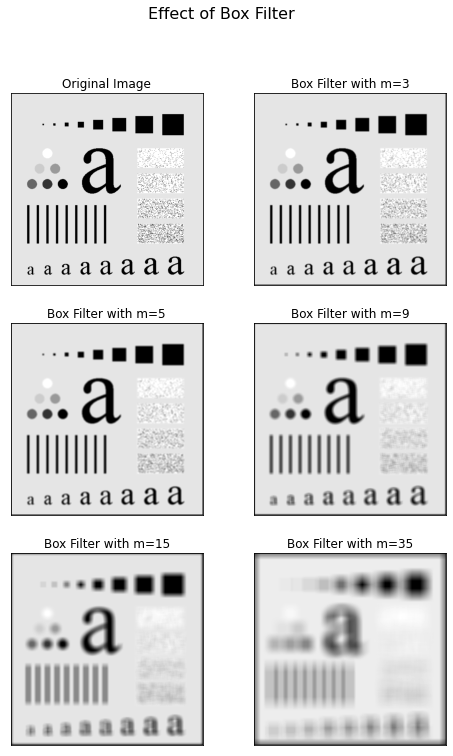

In [ ]:
fig, ax = plt.subplots(3,2, figsize=(8,12))

ax[0][0].imshow(img, cmap = 'gray')
ax[0][0].xaxis.set_ticks([])
ax[0][0].yaxis.set_ticks([])
ax[0][0].title.set_text('Original Image')

ax[0][1].imshow(img_box3, cmap = 'gray')
ax[0][1].xaxis.set_ticks([])
ax[0][1].yaxis.set_ticks([])
ax[0][1].title.set_text('Box Filter with m=3')

ax[1][0].imshow(img_box5, cmap = 'gray')
ax[1][0].xaxis.set_ticks([])
ax[1][0].yaxis.set_ticks([])
ax[1][0].title.set_text('Box Filter with m=5')

ax[1][1].imshow(img_box9, cmap = 'gray')
ax[1][1].xaxis.set_ticks([])
ax[1][1].yaxis.set_ticks([])
ax[1][1].title.set_text('Box Filter with m=9')

ax[2][0].imshow(img_box15, cmap = 'gray')
ax[2][0].xaxis.set_ticks([])
ax[2][0].yaxis.set_ticks([])
ax[2][0].title.set_text('Box Filter with m=15')

ax[2][1].imshow(img_box35, cmap = 'gray')
ax[2][1].xaxis.set_ticks([])
ax[2][1].yaxis.set_ticks([])
ax[2][1].title.set_text('Box Filter with m=35')

fig.suptitle('Effect of Box Filter', fontsize=16)
plt.show() 

**Explanation:** By increasing the kernel size, we observe an increasing blurring effect. Box filters average values in its neighborhood, and replaces the pixel value with the averaged value. A larger kernel size means a larger neighborhood which subsequently causes contrasting values (such as edge values) to be replaced by softer average values and thus causing the blurring effect.

### Graph of the Effect of Weighted Average Filter

In [ ]:
img = cv2.imread('/content/Fig0333(a)(test_pattern_blurring_orig).tif', cv2.IMREAD_GRAYSCALE)
img_wa3 = linear_filter(img, weighted_kernel(3))
img_wa5 = linear_filter(img, weighted_kernel(5))
img_wa9 = linear_filter(img, weighted_kernel(9))
img_wa15 = linear_filter(img, weighted_kernel(15))
img_wa35 = linear_filter(img, weighted_kernel(35))

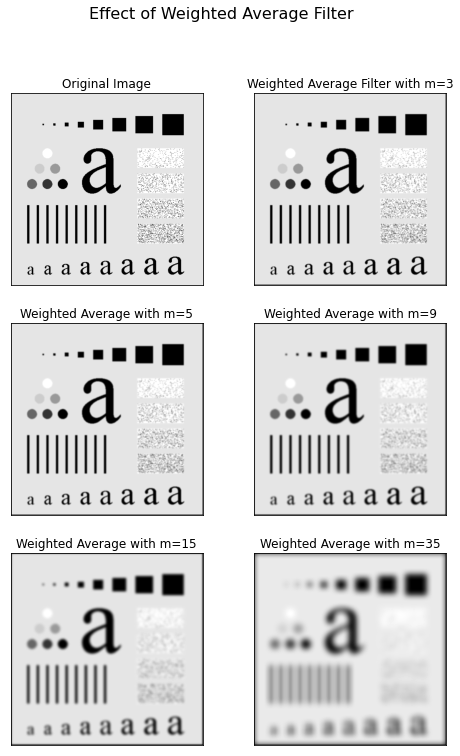

In [ ]:
fig, ax = plt.subplots(3,2, figsize=(8,12))

ax[0][0].imshow(img, cmap = 'gray')
ax[0][0].xaxis.set_ticks([])
ax[0][0].yaxis.set_ticks([])
ax[0][0].title.set_text('Original Image')

ax[0][1].imshow(img_wa3, cmap = 'gray')
ax[0][1].xaxis.set_ticks([])
ax[0][1].yaxis.set_ticks([])
ax[0][1].title.set_text('Weighted Average Filter with m=3')

ax[1][0].imshow(img_wa5, cmap = 'gray')
ax[1][0].xaxis.set_ticks([])
ax[1][0].yaxis.set_ticks([])
ax[1][0].title.set_text('Weighted Average with m=5')

ax[1][1].imshow(img_wa9, cmap = 'gray')
ax[1][1].xaxis.set_ticks([])
ax[1][1].yaxis.set_ticks([])
ax[1][1].title.set_text('Weighted Average with m=9')

ax[2][0].imshow(img_wa15, cmap = 'gray')
ax[2][0].xaxis.set_ticks([])
ax[2][0].yaxis.set_ticks([])
ax[2][0].title.set_text('Weighted Average with m=15')

ax[2][1].imshow(img_wa35, cmap = 'gray')
ax[2][1].xaxis.set_ticks([])
ax[2][1].yaxis.set_ticks([])
ax[2][1].title.set_text('Weighted Average with m=35')

fig.suptitle('Effect of Weighted Average Filter', fontsize=16)
plt.show() 

**Explanation:** Weighted Average Filters cause similar blurring effects to Box Filters. However, our weighted average filter has higher weights for the current pixel values and its nearer neighbors. Due to this reason, the current pixel values are more dominant after convoling with a weighted average filter rather than a box filter where the kernel weights are the same. Consequently, the blurring effect at higher kernel sizes is lesser than box filters as current pixel values are retained better in weighted average filters than box filters.

# Task-2 Non Linear Filters

### Task-2a Salt and Pepper Noise

Implementation of Salt and Pepper Noise

**Reference:** https://www.geeksforgeeks.org/add-a-salt-and-pepper-noise-to-an-image-with-python/

In [ ]:
def salt_and_pepper_noise(image, min_noise = 300, max_noise = 1000):
    img = np.array(image)
    row, col = img.shape

    #Corrupting to White Pixels
    num_white = np.random.randint(min_noise, max_noise)
    for i in range(num_white):
        x = np.random.randint(0, row - 1) 
        y = np.random.randint(0, col - 1) 
        img[x, y] = 1

    #Corrupting to Black Pixels 
    num_black = np.random.randint(min_noise, max_noise) 
    for i in range(num_black):  
        x = np.random.randint(0, row - 1)
        y = np.random.randint(0, col - 1)
        img[x, y] = 0
      
    return img

### Task-2b Implementation of Non-Linear Filter (Median) to reduce noise

In [ ]:
def img_filter(image, kernel_size = (3,3), fil_type = 'median'):
  img = np.array(image)
  out_img = np.zeros(img.shape)

  x_fil, y_fil = kernel_size
  if x_fil%2 == 0 or x_fil != y_fil: #Not Allowing Even Filters or Rectangular Filters but can be modified if needed
    print("Error: Wrong Filter Size")
    return
  pad_len = int((x_fil-1)/2)
  img_pad = np.pad(img, pad_width = pad_len)
  x_img, y_img = img_pad.shape

  for i in range(x_img - x_fil):
    for j in range(y_img - y_fil):
      if fil_type == 'mean': 
        out_img[i,j] = np.mean(img_pad[i:i+x_fil, j:j+y_fil])
      elif fil_type == 'median':
        out_img[i,j] = np.median(img_pad[i:i+x_fil, j:j+y_fil])
      elif fil_type == 'max':
        out_img[i,j] = np.max(img_pad[i:i+x_fil, j:j+y_fil])
      elif fil_type == 'min':
        out_img[i,j] = np.min(img_pad[i:i+x_fil, j:j+y_fil])
      else:
        print("Error: Wrong Filter Type")
        return
  return out_img

### Task-2c Effect of Varying Noise Level and Median Filtering

In [ ]:
noisy_img1 = cv2.imread('/content/Fig0335(a)(ckt_board_saltpep_prob_pt05).tif', cv2.IMREAD_GRAYSCALE)
noisy_img2 = salt_and_pepper_noise(noisy_img, 300, 1000)
noisy_img3 = salt_and_pepper_noise(noisy_img, 2500, 10000)
noisy_img4 = salt_and_pepper_noise(noisy_img, 20000, 40000)
noisy_img5 = salt_and_pepper_noise(noisy_img, 50000, 75000)

In [ ]:
median_img1 = img_filter(noisy_img1)
median_img2 = img_filter(noisy_img2)
median_img3 = img_filter(noisy_img3)
median_img4 = img_filter(noisy_img4)
median_img5 = img_filter(noisy_img5)

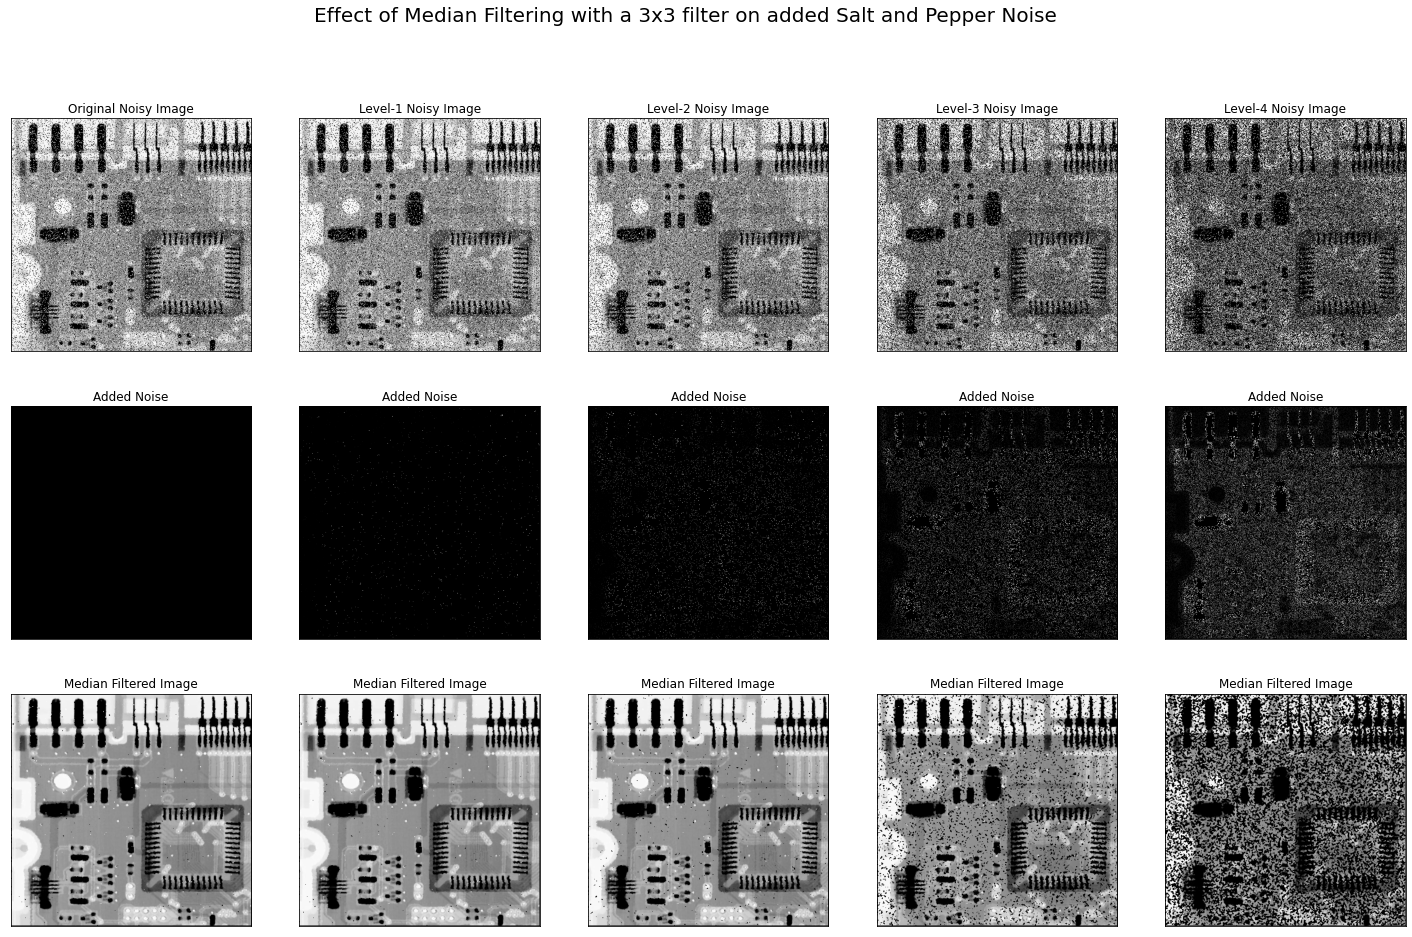

In [ ]:
fig, ax = plt.subplots(3,5, figsize=(25,15))

#Original Noisy Image
ax[0][0].imshow(noisy_img1, cmap = 'gray')
ax[0][0].xaxis.set_ticks([])
ax[0][0].yaxis.set_ticks([])
ax[0][0].title.set_text('Original Noisy Image')

ax[1][0].imshow(noisy_img1 - noisy_img1, cmap = 'gray')
ax[1][0].xaxis.set_ticks([])
ax[1][0].yaxis.set_ticks([])
ax[1][0].title.set_text('Added Noise')

ax[2][0].imshow(median_img1, cmap = 'gray')
ax[2][0].xaxis.set_ticks([])
ax[2][0].yaxis.set_ticks([])
ax[2][0].title.set_text('Median Filtered Image')

#Level-1 Noisy Image
ax[0][1].imshow(noisy_img2, cmap = 'gray')
ax[0][1].xaxis.set_ticks([])
ax[0][1].yaxis.set_ticks([])
ax[0][1].title.set_text('Level-1 Noisy Image')

ax[1][1].imshow(noisy_img2 - noisy_img1, cmap = 'gray')
ax[1][1].xaxis.set_ticks([])
ax[1][1].yaxis.set_ticks([])
ax[1][1].title.set_text('Added Noise')

ax[2][1].imshow(median_img2, cmap = 'gray')
ax[2][1].xaxis.set_ticks([])
ax[2][1].yaxis.set_ticks([])
ax[2][1].title.set_text('Median Filtered Image')

#Level-2 Noisy Image
ax[0][2].imshow(noisy_img3, cmap = 'gray')
ax[0][2].xaxis.set_ticks([])
ax[0][2].yaxis.set_ticks([])
ax[0][2].title.set_text('Level-2 Noisy Image')

ax[1][2].imshow(noisy_img3 - noisy_img1, cmap = 'gray')
ax[1][2].xaxis.set_ticks([])
ax[1][2].yaxis.set_ticks([])
ax[1][2].title.set_text('Added Noise')

ax[2][2].imshow(median_img3, cmap = 'gray')
ax[2][2].xaxis.set_ticks([])
ax[2][2].yaxis.set_ticks([])
ax[2][2].title.set_text('Median Filtered Image')

#Level-3 Noisy Image
ax[0][3].imshow(noisy_img4, cmap = 'gray')
ax[0][3].xaxis.set_ticks([])
ax[0][3].yaxis.set_ticks([])
ax[0][3].title.set_text('Level-3 Noisy Image')

ax[1][3].imshow(noisy_img4 - noisy_img1, cmap = 'gray')
ax[1][3].xaxis.set_ticks([])
ax[1][3].yaxis.set_ticks([])
ax[1][3].title.set_text('Added Noise')

ax[2][3].imshow(median_img4, cmap = 'gray')
ax[2][3].xaxis.set_ticks([])
ax[2][3].yaxis.set_ticks([])
ax[2][3].title.set_text('Median Filtered Image')

#Level-4 Noisy Image
ax[0][4].imshow(noisy_img5, cmap = 'gray')
ax[0][4].xaxis.set_ticks([])
ax[0][4].yaxis.set_ticks([])
ax[0][4].title.set_text('Level-4 Noisy Image')

ax[1][4].imshow(noisy_img5 - noisy_img1, cmap = 'gray')
ax[1][4].xaxis.set_ticks([])
ax[1][4].yaxis.set_ticks([])
ax[1][4].title.set_text('Added Noise')

ax[2][4].imshow(median_img5, cmap = 'gray')
ax[2][4].xaxis.set_ticks([])
ax[2][4].yaxis.set_ticks([])
ax[2][4].title.set_text('Median Filtered Image')

fig.suptitle('Effect of Median Filtering with a 3x3 filter on added Salt and Pepper Noise', fontsize=20)
plt.show() 

**Explanation:** Salt and Pepper Noise randomly changes pixel values of an image to a black or white pixel. The effect of salt and pepper noise can be removed by using Median Filters, which is a non-linear filter that replaces the current pixel value with the neighborhood median. Hence, corrupted pixel values caused by salt and pepper noise gets replaced by the median values resulting in a cleaner image. However, higher levels of noise can make it difficult for the median filter to remove the corruption effect which can be tackled by either using a median filter with larger kernel size or by other sophisticated methods.

# Task-3 Image Sharpening

### Effect of Image Sharpening with the Laplacian Filter

In [ ]:
lap_fil = np.array(
    [[0,-1,0],
    [-1,4,-1],
    [0,-1,0]]
)
print(lap_fil)

[[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]]


In [ ]:
blur_img = cv2.imread('/content/Fig0338(a)(blurry_moon).tif', cv2.IMREAD_GRAYSCALE)
unscaled_lap_img = linear_filter(blur_img, lap_fil, scaling = 0)
scaled_lap_img = linear_filter(blur_img, lap_fil, scaling = 1)
sharpened_img = np.clip(blur_img + scaled_lap_img, 0 ,255)

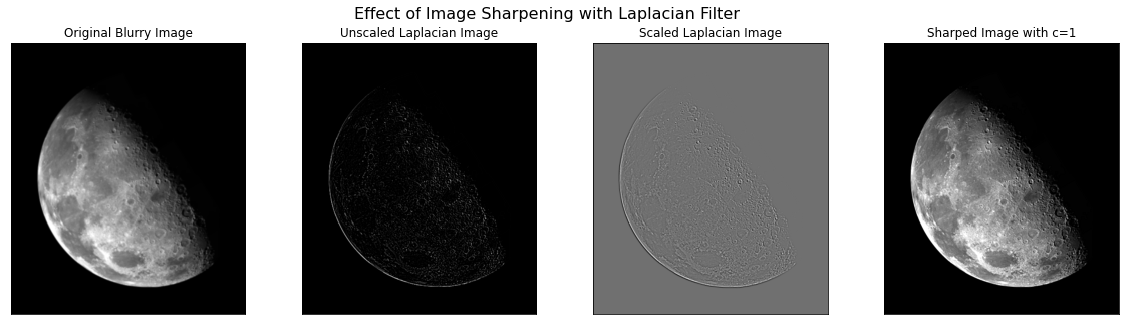

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(20,5))

#Original Blurry Image
ax[0].imshow(blur_img, cmap = 'gray')
ax[0].xaxis.set_ticks([])
ax[0].yaxis.set_ticks([])
ax[0].title.set_text('Original Blurry Image')

#Unscaled Laplacian Image
ax[1].imshow(unscaled_lap_img, cmap = 'gray')
ax[1].xaxis.set_ticks([])
ax[1].yaxis.set_ticks([])
ax[1].title.set_text('Unscaled Laplacian Image')

#Scaled Laplacian Image
ax[2].imshow(scaled_lap_img, cmap = 'gray')
ax[2].xaxis.set_ticks([])
ax[2].yaxis.set_ticks([])
ax[2].title.set_text('Scaled Laplacian Image')

#Sharped Image with c=1
ax[3].imshow(sharpened_img, cmap = 'gray')
ax[3].xaxis.set_ticks([])
ax[3].yaxis.set_ticks([])
ax[3].title.set_text('Sharped Image with c=1')

fig.suptitle('Effect of Image Sharpening with Laplacian Filter', fontsize=16)
plt.show() 

### Effect of Hyperparameter c with Laplacian Filter

In [ ]:
sharpened_img1 = np.clip(blur_img + 0.1*scaled_lap_img, 0 ,255)
sharpened_img2 = np.clip(blur_img + 1*scaled_lap_img, 0 ,255)
sharpened_img3 = np.clip(blur_img + 2*scaled_lap_img, 0 ,255)
sharpened_img4 = np.clip(blur_img + 5*scaled_lap_img, 0 ,255)
sharpened_img5 = np.clip(blur_img + 10*scaled_lap_img, 0 ,255)

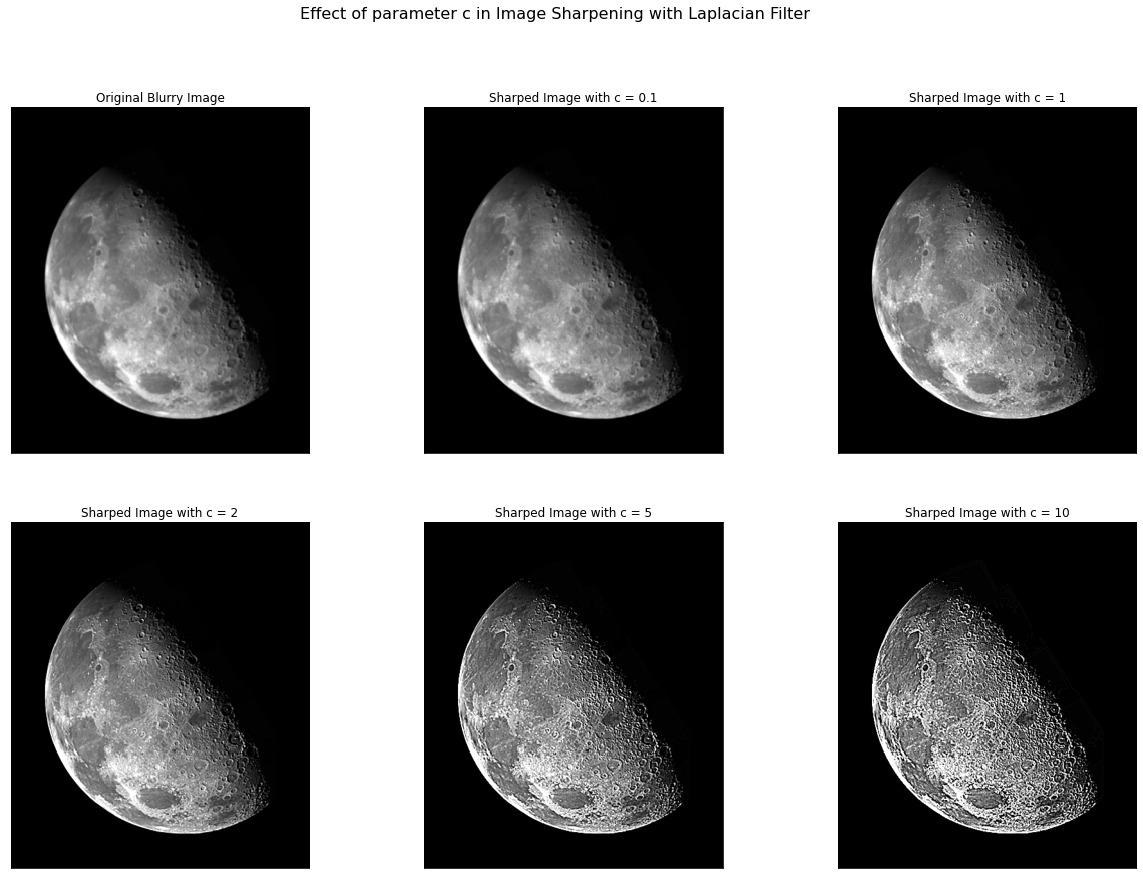

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(21,14))

#Original Blurry Image
ax[0][0].imshow(blur_img, cmap = 'gray')
ax[0][0].xaxis.set_ticks([])
ax[0][0].yaxis.set_ticks([])
ax[0][0].title.set_text('Original Blurry Image')

#Sharped Image with c = 0.1
ax[0][1].imshow(sharpened_img1, cmap = 'gray')
ax[0][1].xaxis.set_ticks([])
ax[0][1].yaxis.set_ticks([])
ax[0][1].title.set_text('Sharped Image with c = 0.1')

#Sharped Image with c = 1
ax[0][2].imshow(sharpened_img2, cmap = 'gray')
ax[0][2].xaxis.set_ticks([])
ax[0][2].yaxis.set_ticks([])
ax[0][2].title.set_text('Sharped Image with c = 1')

#Sharped Image with c = 2
ax[1][0].imshow(sharpened_img3, cmap = 'gray')
ax[1][0].xaxis.set_ticks([])
ax[1][0].yaxis.set_ticks([])
ax[1][0].title.set_text('Sharped Image with c = 2')

#Sharped Image with c = 5
ax[1][1].imshow(sharpened_img4, cmap = 'gray')
ax[1][1].xaxis.set_ticks([])
ax[1][1].yaxis.set_ticks([])
ax[1][1].title.set_text('Sharped Image with c = 5')

#Sharped Image with c = 10
ax[1][2].imshow(sharpened_img5, cmap = 'gray')
ax[1][2].xaxis.set_ticks([])
ax[1][2].yaxis.set_ticks([])
ax[1][2].title.set_text('Sharped Image with c = 10')

fig.suptitle('Effect of parameter c in Image Sharpening with Laplacian Filter', fontsize=16)
plt.show() 

**Explanation:** Image sharpening is performed by adding the original image with the scaled Laplacian filter convolved response. The weight of the added Laplacian response is called c which can be tuned manually. With lower values of c, we keep observing the image as a blurred image but the higher values of c, the image gets crispier which look like added noise. I prefer c=1, for the given blurred moon image.